In [ ]:
import os
import pandas as pd

# Define the path to the data folder
data_folder = '../data'

# Initialize dictionaries to store total times for robot and ar
total_time_robot = {}
total_time_ar = {}

# Iterate over each file in the data folder
for filename in os.listdir(data_folder):
    if filename.endswith('.csv'):
        # Read the CSV file into a DataFrame
        file_path = os.path.join(data_folder, filename)
        df = pd.read_csv(file_path)
        
        # Extract the subject ID from the filename (assuming the filename contains the subject ID)
        subject_id = filename.split('-')[0]
        print(f'Processing data for subject {subject_id}...')
        
        # Calculate the total time for robot and ar
        total_session_time = df.loc[df['Task'] == 'TOTAL SESSION TIME', 'Task Duration (secs)'].values[0]
        if 'Robot' in filename:
            total_time_robot[subject_id] = total_session_time
        elif 'AR' in filename:
            total_time_ar[subject_id] = total_session_time

# Compare the total time between robot and ar across different subjects
comparison_df = pd.DataFrame({
    'subject_id': list(total_time_robot.keys()),
    'total_time_robot': list(total_time_robot.values()) ,
    'total_time_ar':  list(total_time_ar.values())
})

print(comparison_df)

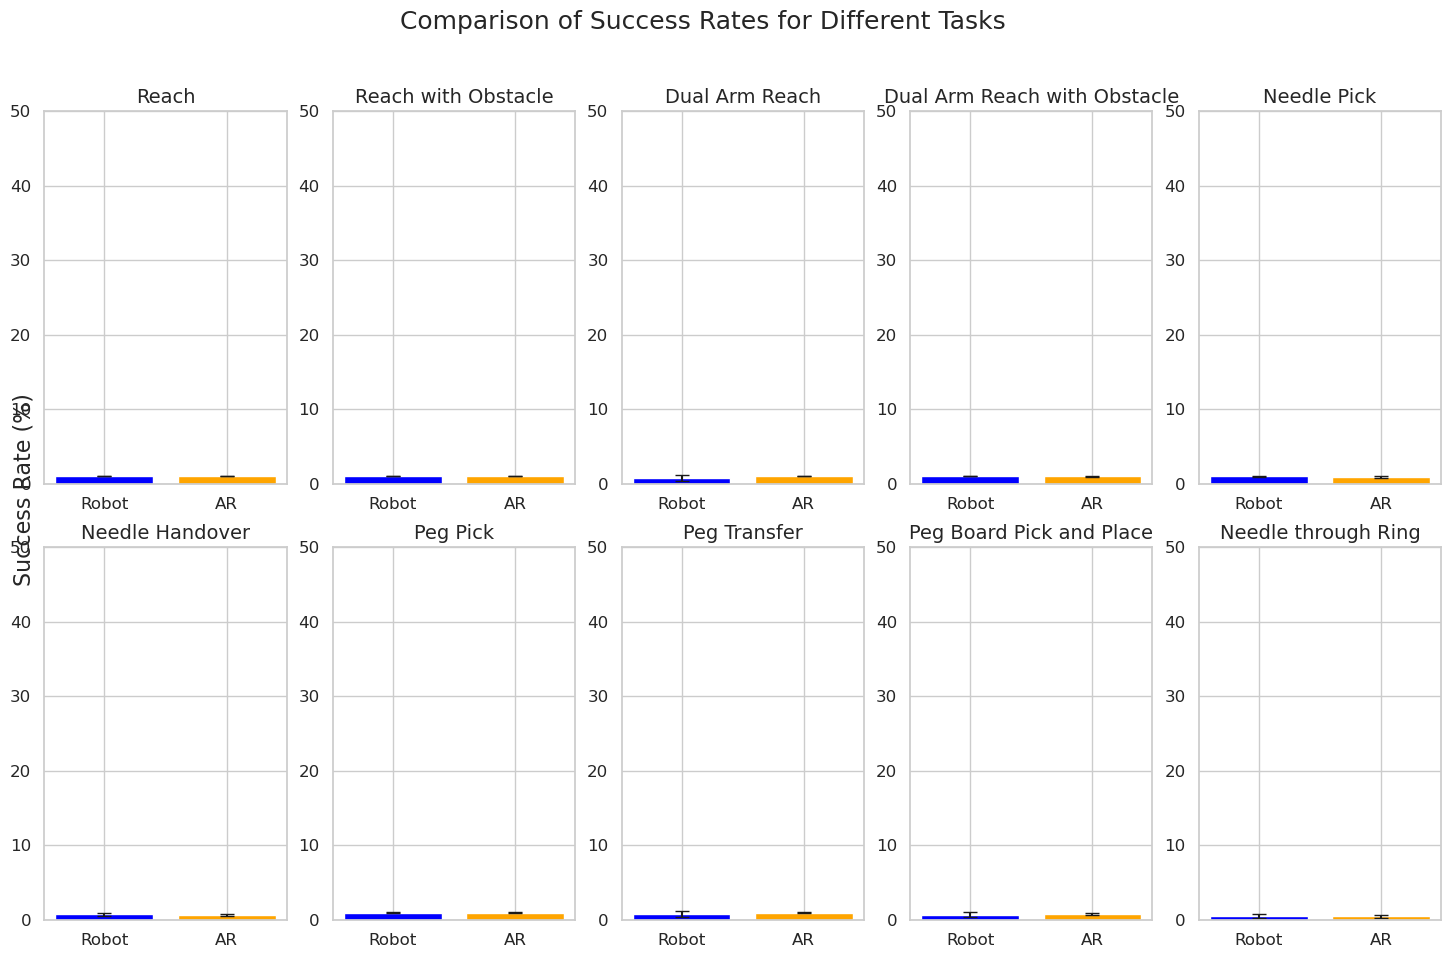

                           Task  avg_success_rate_robot  \
0                         Reach                1.000000   
1           Reach with Obstacle                1.000000   
2                Dual Arm Reach                0.818182   
3  Dual Arm Reach with Obstacle                1.000000   
4                   Needle Pick                0.988636   
5               Needle Handover                0.764167   
6                      Peg Pick                0.975152   
7                  Peg Transfer                0.761189   
8      Peg Board Pick and Place                0.684722   
9           Needle through Ring                0.568333   

   std_success_rate_robot  avg_success_rate_ar  std_success_rate_ar  
0                0.000000             1.000000             0.000000  
1                0.000000             1.000000             0.000000  
2                0.404520             1.000000             0.000000  
3                0.000000             0.991707             0.018259  


In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize dictionaries to store success rates for each task
total_success_robot = {}
total_success_ar = {}

# Iterate over each file in the data folder
for filename in os.listdir(data_folder):
    if filename.endswith('.csv'):
        # Read the CSV file into a DataFrame
        file_path = os.path.join(data_folder, filename)
        df = pd.read_csv(file_path)
        
        # Extract the subject ID from the filename (assuming the filename contains the subject ID)
        subject_id = filename.split('-')[0]

        # Define the tasks
        tasks = df['Task'][:-1]  # Exclude the last row which is 'TOTAL SESSION TIME'

        # Iterate over each task and store the success rates
        for task in tasks:
            success_rate = df.loc[df['Task'] == task, 'Success Rate'].values[0]
            if 'Robot' in filename:
                if task not in total_success_robot:
                    total_success_robot[task] = []
                total_success_robot[task].append(success_rate)
            elif 'AR' in filename:
                if task not in total_success_ar:
                    total_success_ar[task] = []
                total_success_ar[task].append(success_rate)

# Calculate the average success rate and standard deviation for each task
avg_success_robot = {task: sum(rates) / len(rates) for task, rates in total_success_robot.items()}
avg_success_ar = {task: sum(rates) / len(rates) for task, rates in total_success_ar.items()}
std_success_robot = {task: pd.Series(rates).std() for task, rates in total_success_robot.items()}
std_success_ar = {task: pd.Series(rates).std() for task, rates in total_success_ar.items()}

# Create a DataFrame to store the average success rates and standard deviations
success_df = pd.DataFrame({
    'Task': list(avg_success_robot.keys()),
    'avg_success_rate_robot': list(avg_success_robot.values()),
    'std_success_rate_robot': list(std_success_robot.values()),
    'avg_success_rate_ar': list(avg_success_ar.values()),
    'std_success_rate_ar': list(std_success_ar.values())
})

# Plot the data with error bars
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 10))
axes = axes.flatten()

for i, task in enumerate(success_df['Task']):
    axes[i].bar(['Robot', 'AR'], 
                [success_df.loc[success_df['Task'] == task, 'avg_success_rate_robot'].values[0], 
                 success_df.loc[success_df['Task'] == task, 'avg_success_rate_ar'].values[0]], 
                yerr=[success_df.loc[success_df['Task'] == task, 'std_success_rate_robot'].values[0], 
                      success_df.loc[success_df['Task'] == task, 'std_success_rate_ar'].values[0]], 
                capsize=5, color=['blue', 'orange'])
    axes[i].set_title(task, fontsize=14)
    axes[i].set_ylim(0, 50)
    axes[i].tick_params(axis='x', labelsize=12)
    axes[i].tick_params(axis='y', labelsize=12)

# Add a common y-axis label
fig.text(0.04, 0.5, 'Success Rate (%)', va='center', rotation='vertical', fontsize=16)

# Add a common title
fig.suptitle('Comparison of Success Rates for Different Tasks', fontsize=18)

plt.tight_layout(rect=[0.03, 0.03, 1, 0.95])
plt.show()

print(success_df)


/tmp/ipykernel_27254/3423078376.py:108: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.subplots_adjust(left=0.12)  # Shift plots slightly to the right


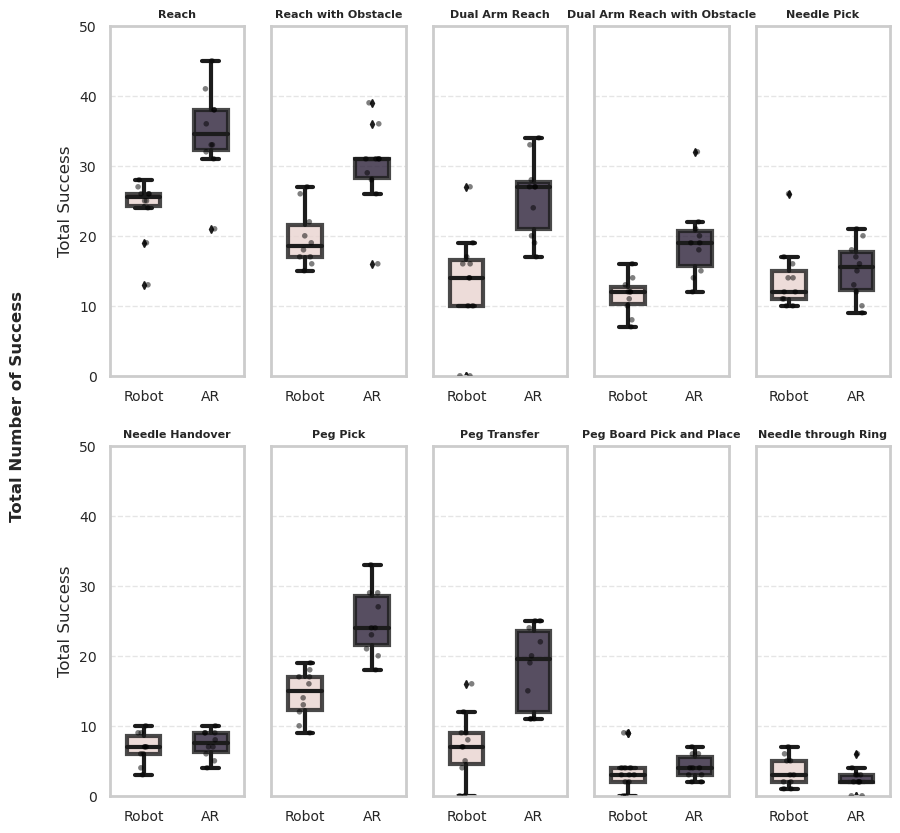

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize dictionaries to store success rates for each task
total_success_robot = {}
total_success_ar = {}

# Iterate over each file in the data folder
for filename in os.listdir(data_folder):
    if filename.endswith('.csv'):
        file_path = os.path.join(data_folder, filename)
        df = pd.read_csv(file_path)

        # Extract subject ID
        subject_id = filename.split('-')[0]

        # Define the tasks (excluding the last row if necessary)
        tasks = df['Task'][:-1]

        # Iterate over each task and store the success rates
        for task in tasks:
            total_success = df.loc[df['Task'] == task, 'Total Success'].values[0]
            if 'Robot' in filename:
                total_success_robot.setdefault(task, []).append(total_success)
            elif 'AR' in filename:
                total_success_ar.setdefault(task, []).append(total_success)

# Convert data into a long-format DataFrame for Seaborn
data_list = []
for task in total_success_robot.keys():
    for val in total_success_robot[task]:
        data_list.append({"Task": task, "Method": "Robot", "Total Success": val})
    for val in total_success_ar[task]:
        data_list.append({"Task": task, "Method": "AR", "Total Success": val})

success_df = pd.DataFrame(data_list)

# Compute statistics for bar plot
avg_success_robot = {task: np.mean(rates) for task, rates in total_success_robot.items()}
std_success_robot = {task: np.std(rates, ddof=1) for task, rates in total_success_robot.items()}
avg_success_ar = {task: np.mean(rates) for task, rates in total_success_ar.items()}
std_success_ar = {task: np.std(rates, ddof=1) for task, rates in total_success_ar.items()}

# Convert summary statistics to DataFrame for overlaying bar plots
summary_df = pd.DataFrame({
    'Task': list(avg_success_robot.keys()) * 2,
    'Method': ['Robot'] * len(avg_success_robot) + ['AR'] * len(avg_success_ar),
    'Mean Success Rate': list(avg_success_robot.values()) + list(avg_success_ar.values()),
    'Std Dev': list(std_success_robot.values()) + list(std_success_ar.values())
})


# Set up Seaborn style
sns.set(style="whitegrid")
plt.rcParams.update({'font.family': 'Arial', 'font.size': 8})

# Determine number of rows and columns dynamically
num_tasks = success_df['Task'].nunique()
ncols = min(5, num_tasks)  # Max 5 columns per row
nrows = int(np.ceil(num_tasks / ncols))

# Create subplots with shared y-axis
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(2 * ncols, 5 * nrows), 
                         constrained_layout=True, sharey=True)
axes = axes.flatten()

# Define color palette
colors = sns.cubehelix_palette(2)

# Loop through tasks
for i, task in enumerate(success_df['Task'].unique()):
    ax = axes[i]

    # Box Plot for Distribution
    sns.boxplot(data=success_df[success_df['Task'] == task], x="Method", y="Total Success", ax=ax,
                palette=colors[:2], width=0.5, linewidth=3, fliersize=4, boxprops=dict(alpha=0.8))
    
    # Strip Plot for Individual Points
    sns.stripplot(data=success_df[success_df['Task'] == task], x="Method", y="Total Success", ax=ax,
                  color="black", alpha=0.5, jitter=True, size=4)

    # Increase the thickness of subplot borders
    for spine in ax.spines.values():
        spine.set_linewidth(2)  # Makes all four borders thicker
        spine.set_color('black')  # Change border color to black

    ax.set_title(task, fontsize=8, fontweight="bold")
    ax.set_ylim(0, 50)
    
    # Remove x-axis label "Method" under each subplot
    ax.set_xlabel("")
    
    # Hide y-axis labels for all but the leftmost plots
    if i % ncols != 0:
        ax.set_ylabel("")

    ax.tick_params(axis='x', labelsize=10)
    ax.tick_params(axis='y', labelsize=10)
    ax.grid(axis='y', linestyle="--", alpha=0.5)

# Hide empty subplots
for j in range(i + 1, nrows * ncols):
    fig.delaxes(axes[j])

# Adjust layout to prevent y-axis label from overlapping
fig.subplots_adjust(left=0.12)  # Shift plots slightly to the right

# Shared y-axis label
fig.text(0.02, 0.5, 'Total Number of Success', va='center', rotation='vertical', fontsize=12, fontweight="bold")

# Save figure with high resolution (300 DPI)
plt.savefig("../fig/success_plot.png", dpi=300, bbox_inches="tight")

# Show plot
plt.show()



/tmp/ipykernel_27254/3229982516.py:109: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.subplots_adjust(left=0.12)  # Shift plots slightly to the right


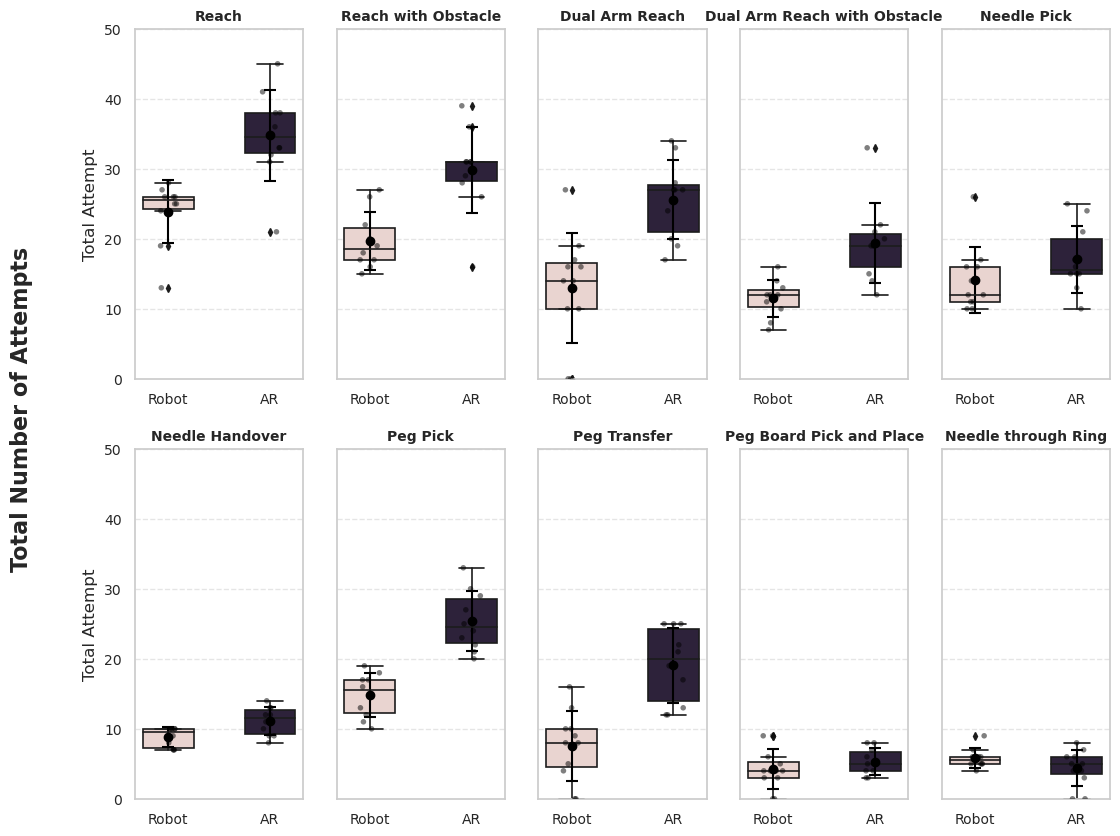

In [49]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize dictionaries to store total attempts for each task
total_attempt_robot = {}
total_attempt_ar = {}

# Iterate over each file in the data folder
for filename in os.listdir(data_folder):
    if filename.endswith('.csv'):
        file_path = os.path.join(data_folder, filename)
        df = pd.read_csv(file_path)

        # Extract subject ID
        subject_id = filename.split('-')[0]

        # Define the tasks (excluding the last row if necessary)
        tasks = df['Task'][:-1]

        # Iterate over each task and store the total attempts
        for task in tasks:
            total_attempt = df.loc[df['Task'] == task, 'Total attempt'].values[0]
            if 'Robot' in filename:
                total_attempt_robot.setdefault(task, []).append(total_attempt)
            elif 'AR' in filename:
                total_attempt_ar.setdefault(task, []).append(total_attempt)

# Convert data into a long-format DataFrame for Seaborn
data_list = []
for task in total_attempt_robot.keys():
    for val in total_attempt_robot[task]:
        data_list.append({"Task": task, "Method": "Robot", "Total Attempt": val})
    for val in total_attempt_ar[task]:
        data_list.append({"Task": task, "Method": "AR", "Total Attempt": val})

attempt_df = pd.DataFrame(data_list)

# Compute statistics for bar plot
avg_attempt_robot = {task: np.mean(rates) for task, rates in total_attempt_robot.items()}
std_attempt_robot = {task: np.std(rates, ddof=1) for task, rates in total_attempt_robot.items()}
avg_attempt_ar = {task: np.mean(rates) for task, rates in total_attempt_ar.items()}
std_attempt_ar = {task: np.std(rates, ddof=1) for task, rates in total_attempt_ar.items()}

# Convert summary statistics to DataFrame for overlaying bar plots
summary_df = pd.DataFrame({
    'Task': list(avg_attempt_robot.keys()) * 2,
    'Method': ['Robot'] * len(avg_attempt_robot) + ['AR'] * len(avg_attempt_ar),
    'Mean Attempt': list(avg_attempt_robot.values()) + list(avg_attempt_ar.values()),
    'Std Dev': list(std_attempt_robot.values()) + list(std_attempt_ar.values())
})

# Set up Seaborn style
sns.set(style="whitegrid")
plt.rcParams.update({'font.family': 'Times New Roman', 'font.size': 8})

# Determine number of rows and columns dynamically
num_tasks = attempt_df['Task'].nunique()
ncols = min(5, num_tasks)  # Max 5 columns per row
nrows = int(np.ceil(num_tasks / ncols))

# Create subplots with shared y-axis
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(2.5 * ncols, 5 * nrows), 
                         constrained_layout=True, sharey=True)
axes = axes.flatten()

# Define color palette
colors = sns.cubehelix_palette(2)

# Loop through tasks
for i, task in enumerate(attempt_df['Task'].unique()):
    ax = axes[i]

    # Box Plot for Distribution
    sns.boxplot(data=attempt_df[attempt_df['Task'] == task], x="Method", y="Total Attempt", ax=ax,
                palette=colors[:2], width=0.5, linewidth=1.2, fliersize=4, boxprops=dict(alpha=1))

    # Strip Plot for Individual Points
    sns.stripplot(data=attempt_df[attempt_df['Task'] == task], x="Method", y="Total Attempt", ax=ax,
                  color="black", alpha=0.5, jitter=True, size=4)

    # Bar Plot Overlay for Mean ± Std Dev
    for method in ['Robot', 'AR']:
        mean_val = summary_df.loc[(summary_df['Task'] == task) & (summary_df['Method'] == method), 'Mean Attempt'].values[0]
        std_val = summary_df.loc[(summary_df['Task'] == task) & (summary_df['Method'] == method), 'Std Dev'].values[0]
        ax.errorbar(method, mean_val, yerr=std_val, fmt='o', color='black', capsize=4, elinewidth=1.5, capthick=1.5)

    ax.set_title(task, fontsize=10, fontweight="bold")
    ax.set_ylim(0, 50)
    
    # Remove x-axis label "Method" under each subplot
    ax.set_xlabel("")
    
    # Hide y-axis labels for all but the leftmost plots
    if i % ncols != 0:
        ax.set_ylabel("")

    ax.tick_params(axis='x', labelsize=10)
    ax.tick_params(axis='y', labelsize=10)
    ax.grid(axis='y', linestyle="--", alpha=0.5)

# Hide empty subplots
for j in range(i + 1, nrows * ncols):
    fig.delaxes(axes[j])

# Adjust layout to prevent y-axis label from overlapping
fig.subplots_adjust(left=0.12)  # Shift plots slightly to the right

# Shared y-axis label
fig.text(0.02, 0.5, 'Total Number of Attempts', va='center', rotation='vertical', fontsize=16, fontweight="bold")

# Save figure with high resolution (300 DPI)
plt.savefig("total_attempt_plot.png", dpi=300, bbox_inches="tight")

# Show plot
plt.show()


/tmp/ipykernel_27254/236106771.py:119: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.subplots_adjust(left=0.12)  # Shift plots slightly to the right


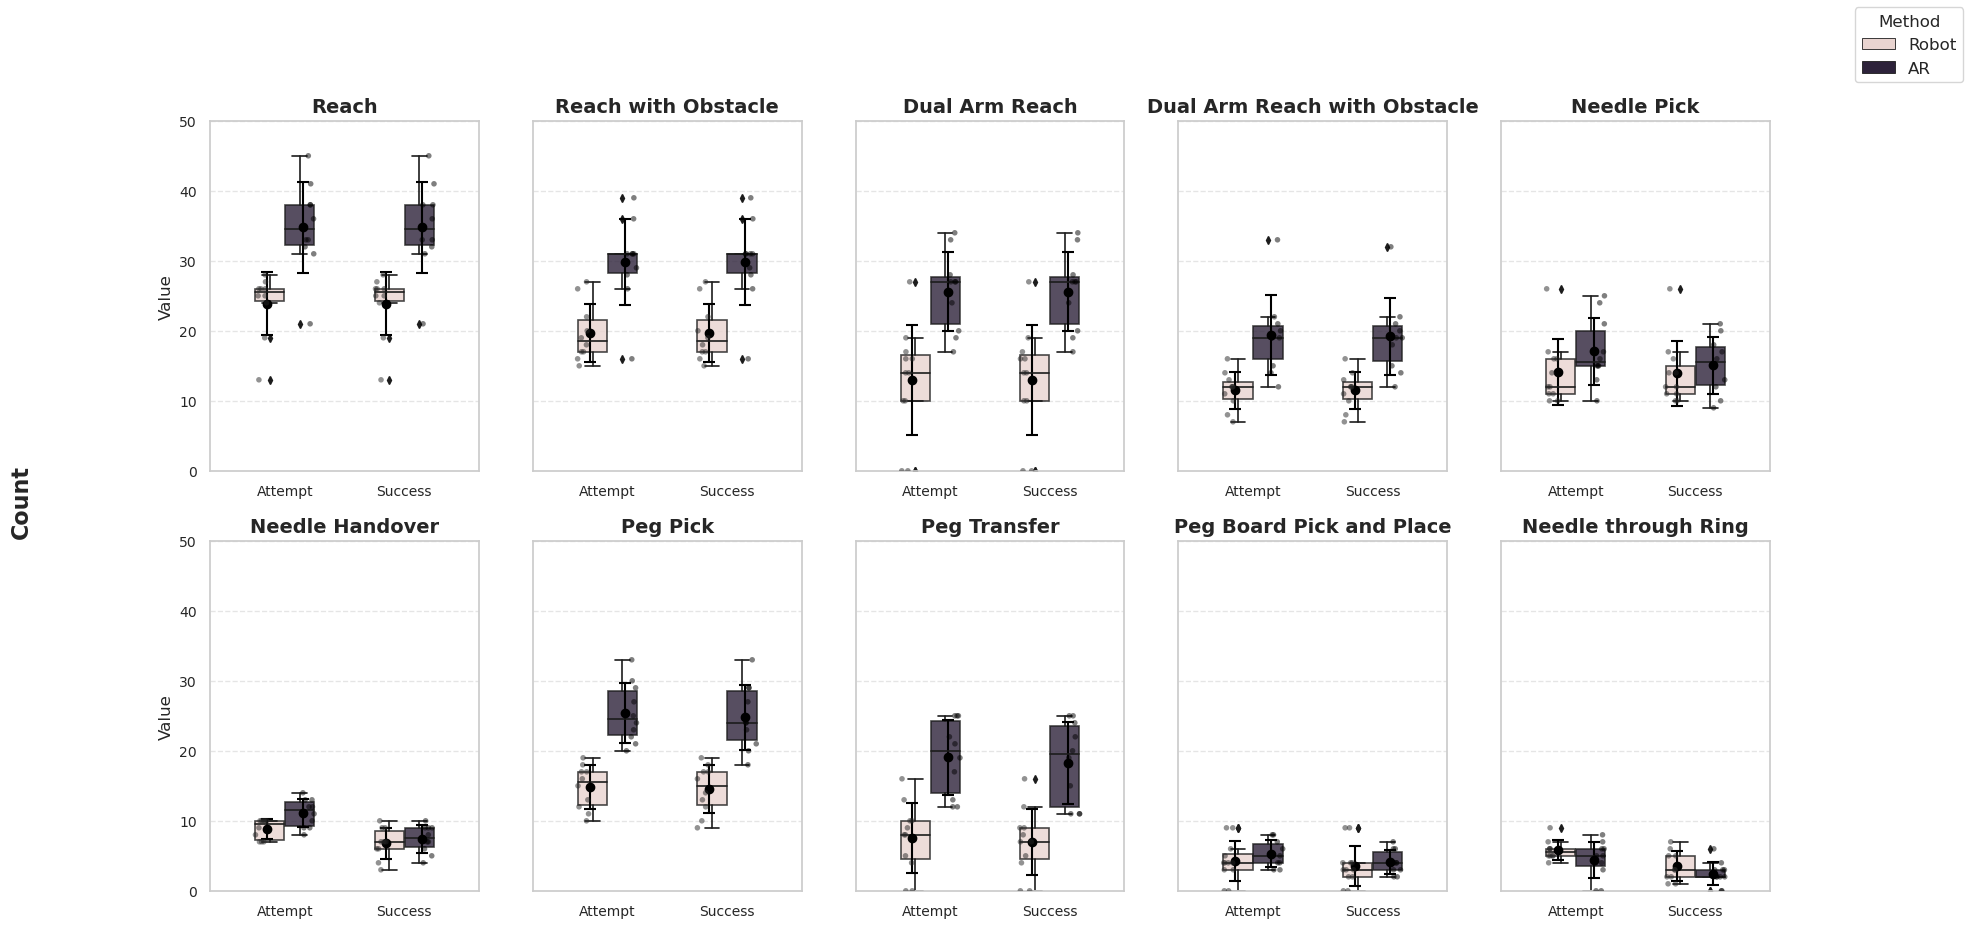

In [54]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize dictionaries to store attempts and successes
total_success_robot = {}
total_success_ar = {}
total_attempt_robot = {}
total_attempt_ar = {}

# Iterate over each file in the data folder
for filename in os.listdir(data_folder):
    if filename.endswith('.csv'):
        file_path = os.path.join(data_folder, filename)
        df = pd.read_csv(file_path)

        # Extract subject ID
        subject_id = filename.split('-')[0]

        # Define the tasks (excluding the last row if necessary)
        tasks = df['Task'][:-1]

        # Iterate over each task and store attempts and successes
        for task in tasks:
            total_attempt = df.loc[df['Task'] == task, 'Total attempt'].values[0]
            total_success = df.loc[df['Task'] == task, 'Total Success'].values[0]
            
            if 'Robot' in filename:
                total_attempt_robot.setdefault(task, []).append(total_attempt)
                total_success_robot.setdefault(task, []).append(total_success)
            elif 'AR' in filename:
                total_attempt_ar.setdefault(task, []).append(total_attempt)
                total_success_ar.setdefault(task, []).append(total_success)

# Convert data into a long-format DataFrame for Seaborn
data_list = []
for task in total_attempt_robot.keys():
    for val in total_attempt_robot[task]:
        data_list.append({"Task": task, "Metric": "Attempt", "Method": "Robot", "Value": val})
    for val in total_attempt_ar[task]:
        data_list.append({"Task": task, "Metric": "Attempt", "Method": "AR", "Value": val})
    for val in total_success_robot[task]:
        data_list.append({"Task": task, "Metric": "Success", "Method": "Robot", "Value": val})
    for val in total_success_ar[task]:
        data_list.append({"Task": task, "Metric": "Success", "Method": "AR", "Value": val})

combined_df = pd.DataFrame(data_list)

# Compute statistics for bar plot overlay
avg_values = combined_df.groupby(['Task', 'Metric', 'Method'])['Value'].mean().reset_index()
std_values = combined_df.groupby(['Task', 'Metric', 'Method'])['Value'].std(ddof=1).reset_index()

summary_df = avg_values.merge(std_values, on=['Task', 'Metric', 'Method'], suffixes=('_mean', '_std'))

# Set up Seaborn style
sns.set(style="whitegrid")
plt.rcParams.update({'font.family': 'Times New Roman', 'font.size': 8})

# Determine number of rows and columns dynamically
num_tasks = combined_df['Task'].nunique()
ncols = min(5, num_tasks)  # Max 5 columns per row
nrows = int(np.ceil(num_tasks / ncols))

# Create subplots with shared y-axis
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(4 * ncols, 5 * nrows), 
                         constrained_layout=True, sharey=True)
axes = axes.flatten()

# Define color palette
colors = sns.cubehelix_palette(2)

# Loop through tasks
for i, task in enumerate(combined_df['Task'].unique()):
    ax = axes[i]

    # Box Plot for Distribution
    sns.boxplot(data=combined_df[combined_df['Task'] == task], x="Metric", y="Value", hue="Method", ax=ax,
                palette=colors[:2], width=0.5, linewidth=1.2, fliersize=4, boxprops=dict(alpha=0.8))

    # Strip Plot for Individual Points
    sns.stripplot(data=combined_df[combined_df['Task'] == task], x="Metric", y="Value", hue="Method", ax=ax,
                  dodge=True, color="black", alpha=0.5, jitter=True, size=4)

    # Bar Plot Overlay for Mean ± Std Dev
    for metric in ["Attempt", "Success"]:
        for method in ['Robot', 'AR']:
            mean_val = summary_df.loc[(summary_df['Task'] == task) & 
                                      (summary_df['Metric'] == metric) & 
                                      (summary_df['Method'] == method), 'Value_mean'].values[0]
            std_val = summary_df.loc[(summary_df['Task'] == task) & 
                                     (summary_df['Metric'] == metric) & 
                                     (summary_df['Method'] == method), 'Value_std'].values[0]
            x_pos = 0 if metric == "Attempt" else 1  # Assign correct x position
            x_offset = -0.15 if method == "Robot" else 0.15  # Adjust position for Robot vs AR
            ax.errorbar(x_pos + x_offset, mean_val, yerr=std_val, fmt='o', color='black', capsize=4, elinewidth=1.5, capthick=1.5)

    ax.set_title(task, fontsize=14, fontweight="bold")
    ax.set_ylim(0, 50)
    ax.set_xlabel("")
    
    # Remove legend for individual subplots
    ax.get_legend().remove()

    # Hide y-axis labels for all but the leftmost plots
    if i % ncols != 0:
        ax.set_ylabel("")

    ax.tick_params(axis='x', labelsize=10)
    ax.tick_params(axis='y', labelsize=10)
    ax.grid(axis='y', linestyle="--", alpha=0.5)

# Hide empty subplots
for j in range(i + 1, nrows * ncols):
    fig.delaxes(axes[j])

# Adjust layout to prevent y-axis label from overlapping
fig.subplots_adjust(left=0.12)  # Shift plots slightly to the right

# Shared y-axis label
fig.text(0.02, 0.5, 'Count', va='center', rotation='vertical', fontsize=16, fontweight="bold")

# Add common legend outside of the plots
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles[:2], labels[:2], loc="upper right", fontsize=12, frameon=True, title="Method", title_fontsize=12)

# Save figure with high resolution (300 DPI)
plt.savefig("../fig/combined_attempt_success_plot.png", dpi=300, bbox_inches="tight")

# Show plot
plt.show()
